In [1]:
import time
start_time=time.time()

Abstract

Se presenta un ajuste polinomial (0-6 ord) a los datos observacionales para investigar movimientos a gran escala (detrended data) en direciones X y Y.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

import itertools
from scipy.interpolate import interp1d
from scipy import interpolate

from SABReXX import sosf,acf,psk,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms,sfwh,pst
from CorrPoldef import CPV,CPH
from LRdefX import LR,ACLR
from Pltdef import pltdata

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

Input Data

In [3]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB


n=7

Astronomical Observations

In [4]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})


In [5]:
#LimitData
min0=95
max0=120
mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

Emission lines data

In [6]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

# Muestra (i) H alfa

In [7]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,190.000000,190.000000,190.000000,190.000000
mean,107.280526,9.390000,-247.623016,5054.866316
std,7.365136,6.267347,9.806825,5261.747902
min,95.210000,0.000000,-270.969636,401.400000
25%,100.580000,4.000000,-253.382615,1714.250000
50%,107.280000,9.000000,-249.202843,3193.500000
75%,113.990000,15.000000,-243.252948,6317.500000
max,119.350000,19.600000,-205.463695,30960.000000


In [8]:
wd=dt.X.max()-dt.X.min()
hd=dt.Y.max()-dt.Y.min()
ar=wd/hd
sz=4

Statistical Data

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


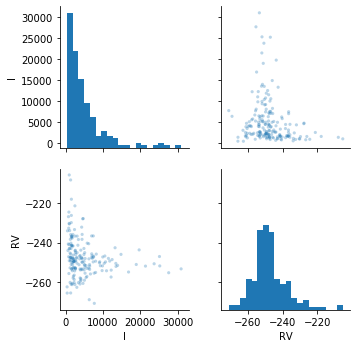

In [9]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


Emission Map

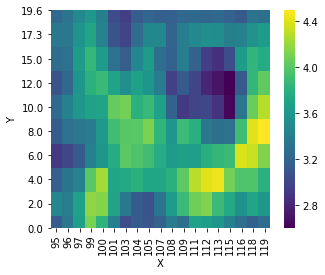

In [10]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
plt.gca().invert_yaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

Radial Velocity

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


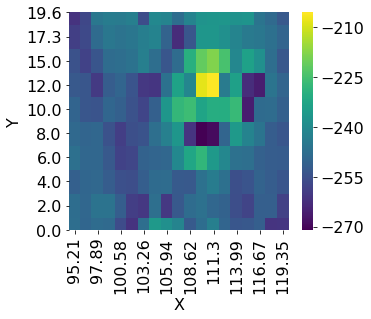

In [11]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

Weighted property

In [12]:
W=np.log(abs((dt.RV*dt.I)/dt.I.sum()))
W.head()

0   -0.667657
1   -0.615268
2   -1.060534
3   -0.979825
4   -0.844147
dtype: float64

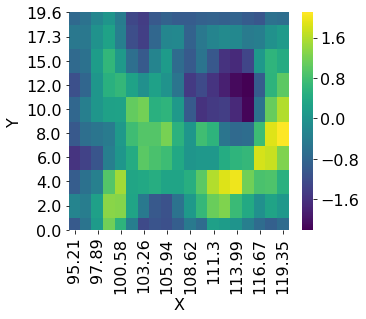

In [13]:
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(dtH_W, cmap="viridis")
plt.gca().invert_yaxis()


Horizontal Polynomial Correction

 
-247.6
 
0.2214 x - 271.4
          2
-0.06352 x + 13.85 x - 999
           3         2
-0.008757 x + 2.755 x - 287.6 x + 9722
           4          3         2
0.0002211 x - 0.1036 x + 17.99 x - 1373 x + 3.866e+04
           5           4         3        2
0.0001522 x - 0.08141 x + 17.39 x - 1852 x + 9.849e+04 x - 2.091e+06
            6             5           4         3        2
-9.673e-08 x + 0.0002144 x - 0.09809 x + 19.76 x - 2043 x + 1.066e+05 x - 2.236e+06


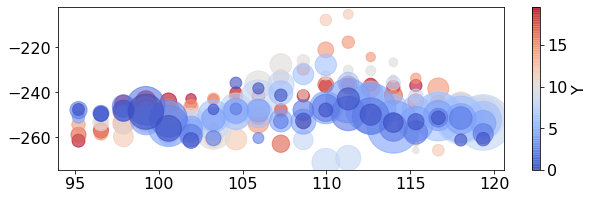

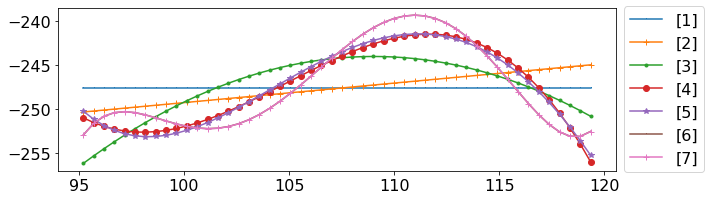

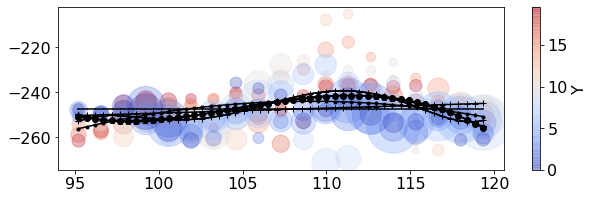

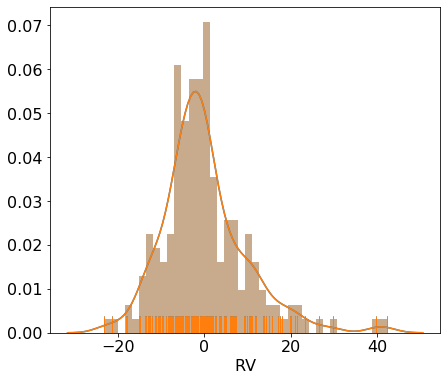

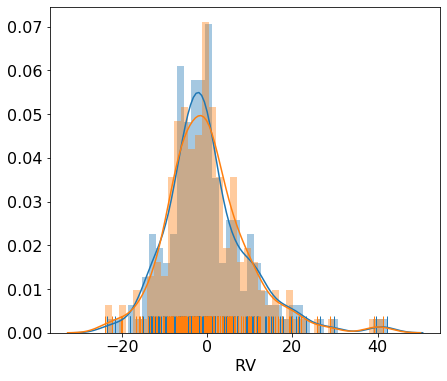

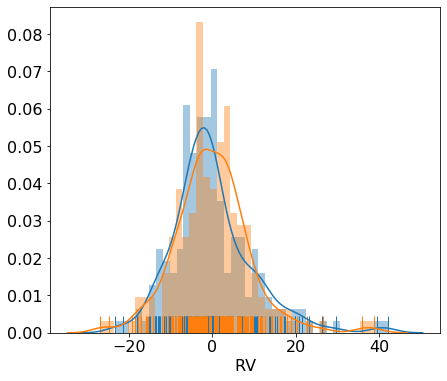

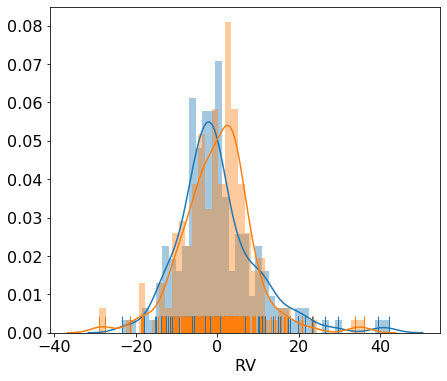

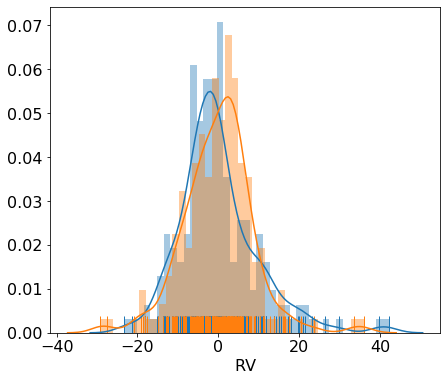

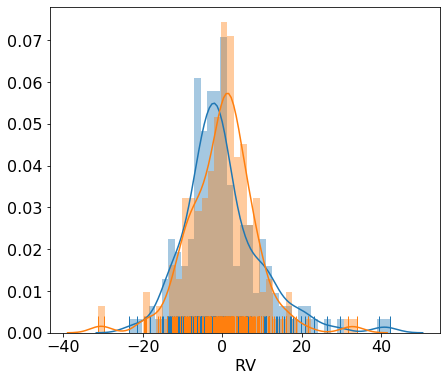

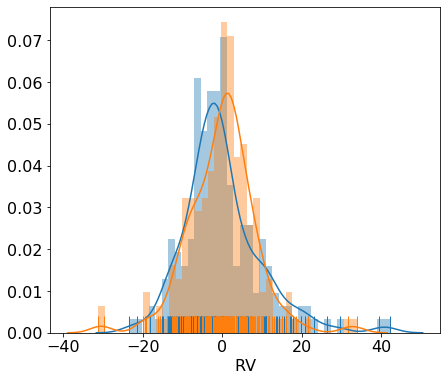

In [14]:
argo1=CPH(dt,n)

Vertical Polynomial Correction

 
-247.6
 
0.3653 x - 251.1
          2
-0.01321 x + 0.6243 x - 251.8
           3          2
-0.004894 x + 0.1296 x - 0.4212 x - 250.6
           4           3          2
0.0004718 x - 0.02334 x + 0.3544 x - 1.297 x - 250.1
           5            4           3          2
5.329e-05 x - 0.002134 x + 0.02105 x + 0.0484 x - 0.5796 x - 250.2
           6            5           4          3         2
5.183e-05 x - 0.002963 x + 0.06349 x - 0.6349 x + 2.989 x - 5.193 x - 249.8


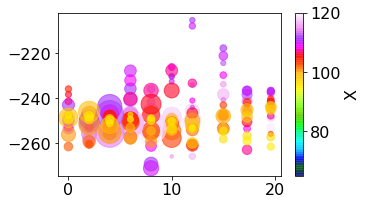

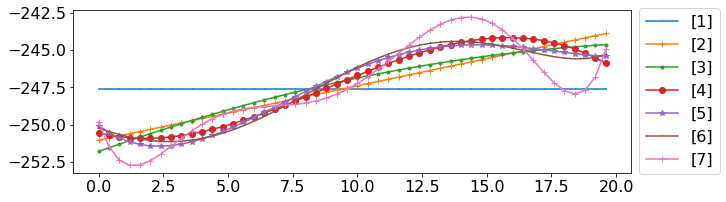

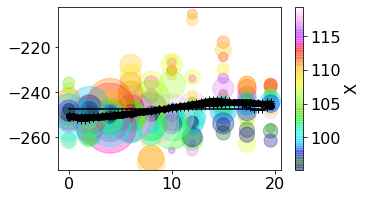

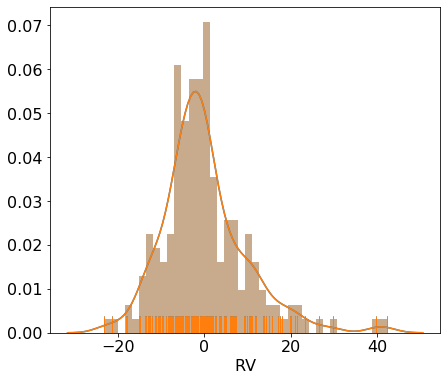

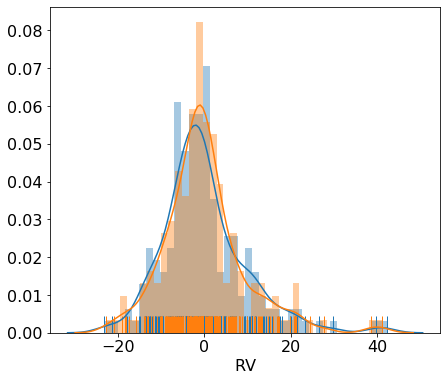

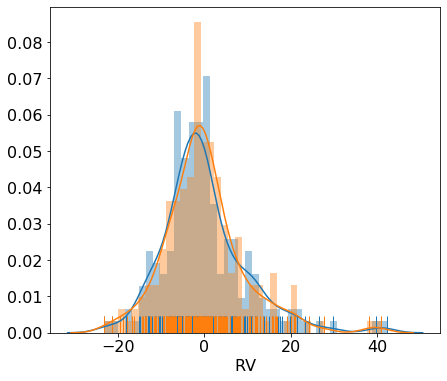

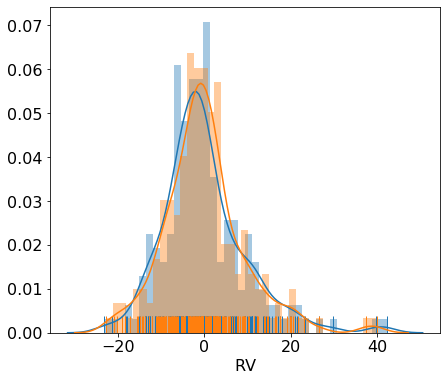

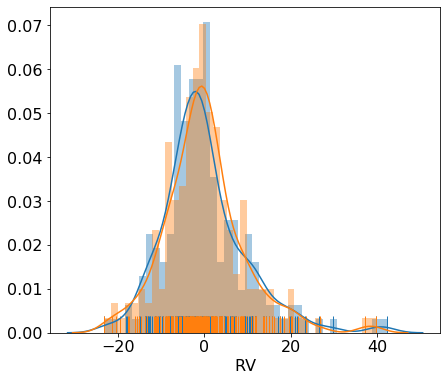

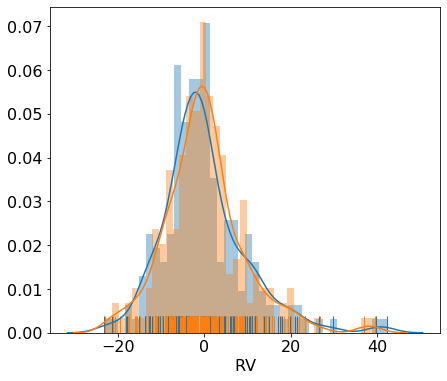

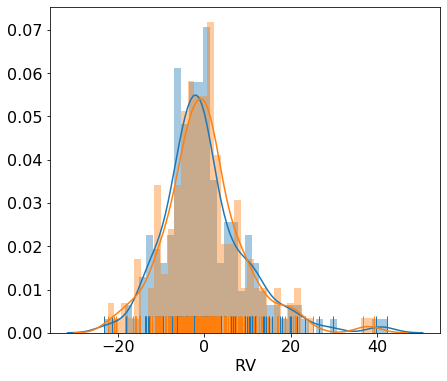

In [15]:
argo2=CPV(dt,n)

Structure Function

In [16]:
SF1=dict()

for i in range(n):
    SF1[i]=sosf(argo1[i])
    
SF2=dict()

for i in range(n):
    SF2[i]=sosf(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [17]:
xi=0
xf=7

SF1Data=dict()
SF1Pr=dict()

for i in range(n):
    SF1Data[i],SF1Pr[i]=LR(SF1[i]['Lag'],SF1[i]['Nmqvd'],SF1[i]['ErrY'],xi,xf,n)
    
SF2Data=dict()
SF2Pr=dict()


for i in range(n):
    SF2Data,SF2Pr[i]=LR(SF2[i]['Lag'],SF2[i]['Nmqvd'],SF2[i]['ErrY'],xi,xf,n)

In [18]:
SF1Data,SF2Data

({0:               R        eps     alpha   lags
  Value  0.978499  82.108428  0.494798  1.340
  Err    0.008389   8.068920  0.041346  9.306,
  1:               R        eps     alpha   lags
  Value  0.980614  80.649574  0.506948  1.340
  Err    0.006657   7.918411  0.041312  9.306,
  2:               R        eps     alpha   lags
  Value  0.977548  80.732700  0.481987  1.340
  Err    0.001805   8.343492  0.043990  9.306,
  3:               R        eps     alpha   lags
  Value  0.944302  80.359642  0.442373  1.340
  Err    0.004434   8.316122  0.043818  9.306,
  4:               R        eps     alpha   lags
  Value  0.940452  79.888572  0.443345  1.340
  Err    0.004771   8.410409  0.044714  9.306,
  5:               R        eps     alpha   lags
  Value  0.920598  80.877374  0.408096  1.340
  Err    0.002943   8.203252  0.042679  9.306,
  6:               R        eps     alpha   lags
  Value  0.920524  80.848621  0.408294  1.340
  Err    0.002963   8.205669  0.042712  9.306},
     

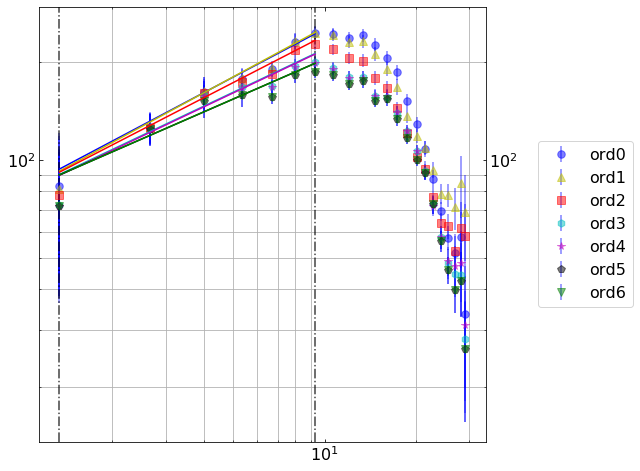

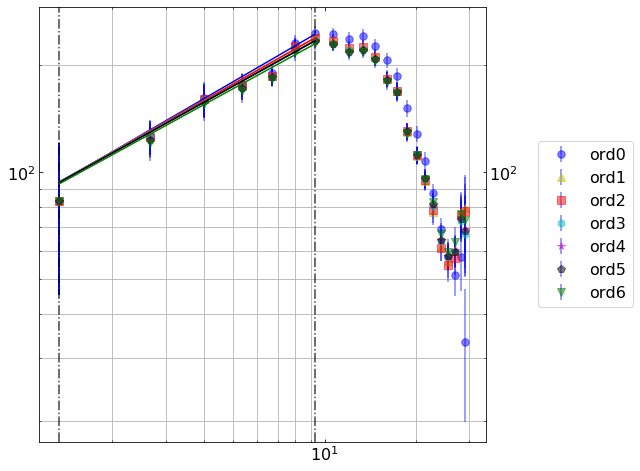

In [19]:
pltdata(SF1,SF1Pr,xi,xf,n)
pltdata(SF2,SF2Pr,xi,xf,n)

Structure Function Norm

In [20]:
SFn1=dict()

for i in range(n):
    SFn1[i]=sosfnorm(argo1[i])
    
SFn2=dict()

for i in range(n):
    SFn2[i]=sosfnorm(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:695: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:704: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [21]:
xi=0
xf=7

SFN1Data=dict()
SFN1Pr=dict()

for i in range(n):
    SFN1Data[i],SFN1Pr[i]=LR(SFn1[i]['Lag'],SFn1[i]['Nmqvd'],SFn1[i]['ErrY'],xi,xf,n)
    
SFN2Data=dict()
SFN2Pr=dict()

for i in range(n):
    SFN2Data[i],SFN2Pr[i]=LR(SFn2[i]['Lag'],SFn2[i]['Nmqvd'],SFn2[i]['ErrY'],xi,xf,n)

In [22]:
SFN1Data,SFN2Data

({0:               R       eps     alpha   lags
  Value  0.978454  0.858307  0.494728  1.340
  Err    0.008469  0.084304  0.041321  9.306,
  1:               R       eps     alpha   lags
  Value  0.980639  0.867237  0.506861  1.340
  Err    0.006626  0.085167  0.041311  9.306,
  2:               R       eps     alpha   lags
  Value  0.977544  0.965037  0.481778  1.340
  Err    0.001797  0.099742  0.043987  9.306,
  3:               R       eps     alpha   lags
  Value  0.944472  1.050717  0.442323  1.340
  Err    0.004463  0.108653  0.043772  9.306,
  4:               R       eps     alpha   lags
  Value  0.940309  1.047114  0.443247  1.340
  Err    0.004721  0.110235  0.044713  9.306,
  5:               R       eps     alpha   lags
  Value  0.920482  1.106841  0.408327  1.340
  Err    0.002993  0.112179  0.042642  9.306,
  6:               R       eps     alpha   lags
  Value  0.920506  1.107095  0.408227  1.340
  Err    0.003012  0.112386  0.042723  9.306},
 {0:               R      

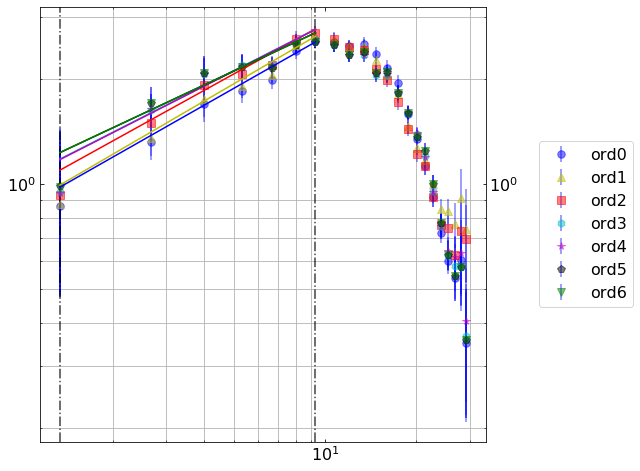

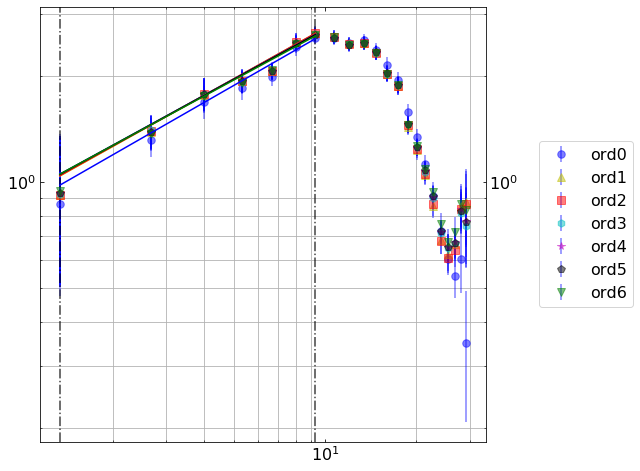

In [23]:
pltdata(SFn1,SFN1Pr,xi,xf,n)
pltdata(SFn2,SFN2Pr,xi,xf,n)

Weighted Structure Function

In [24]:
SFw1=dict()

for i in range(n):
    SFw1[i]=sosfw(argo1[i])

SFw2=dict()

for i in range(n):
    SFw2[i]=sosfw(argo2[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1171: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1180: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [25]:
xi=1
xf=8

SFW1Data=dict()
SFW1Pr=dict()


for i in range(n):
    SFW1Data[i],SFW1Pr[i]=LR(SFw1[i]['Lag'],SFw1[i]['Nmqvd'],SFw1[i]['ErrY'],xi,xf,n)
    
SFW2Data=dict()
SFW2Pr=dict()


for i in range(n):
    SFW2Data[i],SFW2Pr[i]=LR(SFw2[i]['Lag'],SFw2[i]['Nmqvd'],SFw2[i]['ErrY'],xi,xf,n)

In [26]:
SFW1Data,SFW2Data

({0:               R        eps     alpha    lags
  Value  0.796783  20.896488  0.310337   2.667
  Err    0.029183   1.084856  0.015566  10.668,
  1:               R        eps     alpha    lags
  Value  0.798953  21.449059  0.321061   2.667
  Err    0.028342   1.108242  0.015364  10.668,
  2:               R        eps     alpha    lags
  Value  0.755775  25.365936  0.256121   2.667
  Err    0.033103   1.263614  0.014138  10.668,
  3:               R        eps    alpha    lags
  Value  0.839784  27.119366  0.30350   2.667
  Err    0.013453   1.220925  0.01011  10.668,
  4:               R        eps     alpha    lags
  Value  0.841638  26.619650  0.303601   2.667
  Err    0.014304   1.212962  0.010457  10.668,
  5:               R        eps     alpha    lags
  Value  0.908519  24.663050  0.374189   2.667
  Err    0.010736   1.195643  0.011091  10.668,
  6:               R        eps     alpha    lags
  Value  0.908745  24.647710  0.374255   2.667
  Err    0.010712   1.194871  0.0110

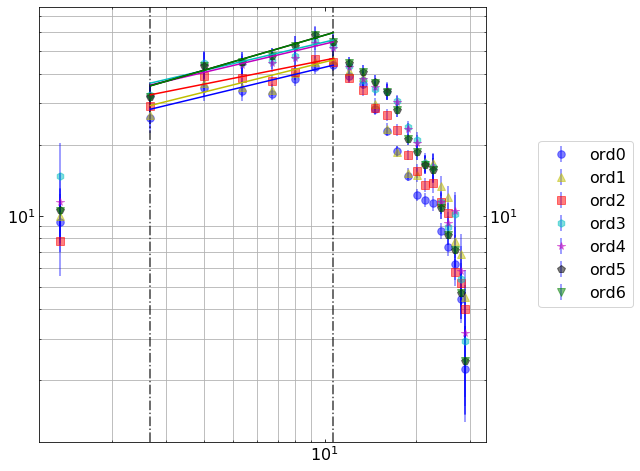

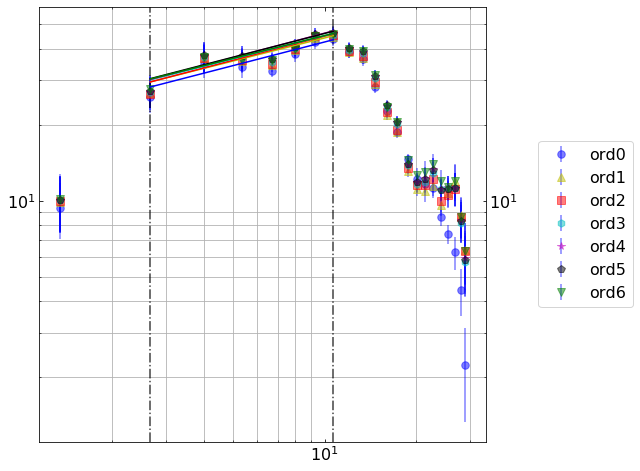

In [27]:
pltdata(SFw1,SFW1Pr,xi,xf,n)
pltdata(SFw2,SFW2Pr,xi,xf,n)

Weighted Property

In [28]:
SFwII1=dict()

for i in range(n):
    SFwII1[i]=sosfw2(argo1[i])
    
SFwII2=dict()

for i in range(n):
    SFwII2[i]=sosfw2(argo1[i])

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1651: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SABRE/SABReXX.py:1660: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)


In [29]:
xi=1
xf=6

SFWII1Data=dict()
SFWII1Pr=dict()

for i in range(n):
    SFWII1Data[i],SFWII1Pr[i]=LR(SFwII1[i]['Lag'],SFwII1[i]['Nmqvd'],SFwII1[i]['ErrY'],xi,xf,n)
    
SFWII2Data=dict()
SFWII2Pr=dict()

for i in range(n):
    SFWII2Data[i],SFWII2Pr[i]=LR(SFwII2[i]['Lag'],SFwII2[i]['Nmqvd'],SFwII2[i]['ErrY'],xi,xf,n)

In [30]:
SFWII1Data,SFWII2Data

({0:               R       eps     alpha   lags
  Value  0.636236  1.681131  0.178856  2.667
  Err    0.067206  0.090976  0.018421  8.000,
  1:               R       eps     alpha   lags
  Value  0.750067  1.443916  0.213429  2.667
  Err    0.046649  0.074922  0.016419  8.000,
  2:               R       eps     alpha   lags
  Value  0.453063  2.012864  0.100700  2.667
  Err    0.105885  0.113515  0.018002  8.000,
  3:               R       eps     alpha   lags
  Value  0.450868  1.874542  0.116463  2.667
  Err    0.074115  0.106653  0.015737  8.000,
  4:               R       eps     alpha   lags
  Value  0.397021  1.937280  0.099062  2.667
  Err    0.083654  0.110321  0.015963  8.000,
  5:               R       eps     alpha   lags
  Value  0.645715  1.885488  0.126881  2.667
  Err    0.078416  0.109812  0.016243  8.000,
  6:               R       eps     alpha   lags
  Value  0.645654  1.887187  0.126273  2.667
  Err    0.078947  0.109847  0.016223  8.000},
 {0:               R      

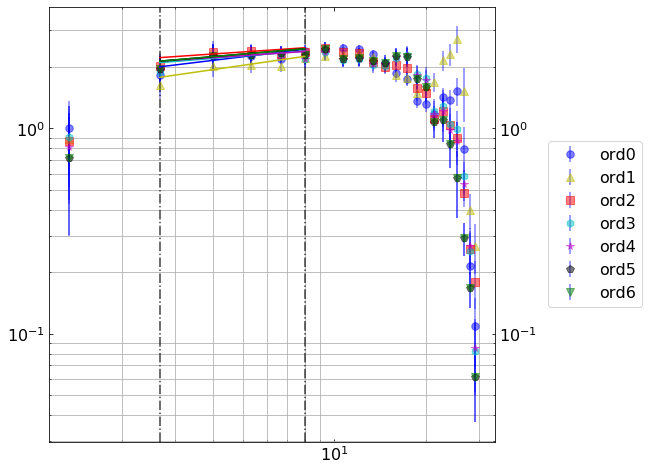

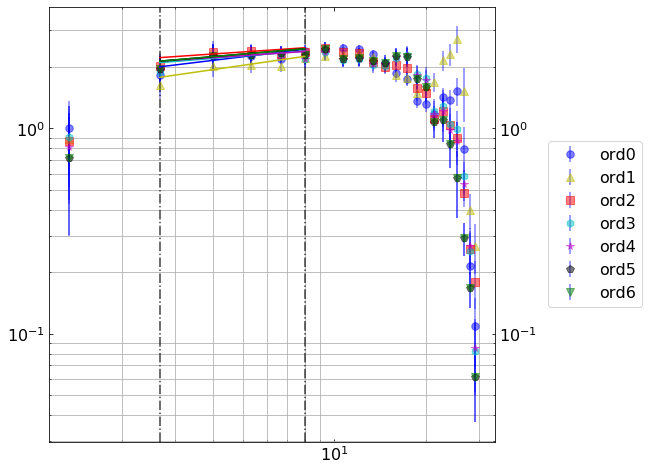

In [31]:
pltdata(SFwII1,SFWII1Pr,xi,xf,n)
pltdata(SFwII2,SFWII2Pr,xi,xf,n)

Structure Function Dr. Will

In [32]:
SFwh1=dict()

for i in range(n):
    SFwh1[i]=sfwh(argo1[i])
    
SFwh2=dict()

for i in range(n):
    SFwh2[i]=sfwh(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [33]:
xi=1
xf=5

SFwh1Data=dict()
SFwh1Pr=dict()

for i in range(n):
    SFwh1Data[i],SFwh1Pr[i]=LR(SFwh1[i]['Lag'],SFwh1[i]['Nmqvd'],SFwh1[i]['ErrY'],xi,xf,n)
    
SFwh2Data=dict()
SFwh2Pr=dict()

for i in range(n):
    SFwh2Data[i],SFwh2Pr[i]=LR(SFwh2[i]['Lag'],SFwh2[i]['Nmqvd'],SFwh2[i]['ErrY'],xi,xf,n)

In [34]:
SFwh1Data,SFwh2Data

({0:               R        eps     alpha   lags
  Value  0.996928  45.524616  0.801020  5.404
  Err    0.000141   1.220945  0.003241  9.242,
  1:               R        eps     alpha   lags
  Value  0.993608  49.525512  0.750030  5.404
  Err    0.000366   1.264635  0.002628  9.242,
  2:               R        eps     alpha   lags
  Value  0.996327  49.564985  0.734865  5.404
  Err    0.000459   1.391504  0.004135  9.242,
  3:               R        eps     alpha   lags
  Value  0.983184  57.222426  0.604910  5.404
  Err    0.000437   1.545525  0.003495  9.242,
  4:               R        eps     alpha   lags
  Value  0.985550  56.340178  0.610038  5.404
  Err    0.000305   1.549427  0.003689  9.242,
  5:               R        eps     alpha   lags
  Value  0.986542  49.751572  0.648245  5.404
  Err    0.000595   1.374862  0.003662  9.242,
  6:               R        eps     alpha   lags
  Value  0.986542  49.761219  0.648139  5.404
  Err    0.000595   1.375806  0.003668  9.242},
 {0: 

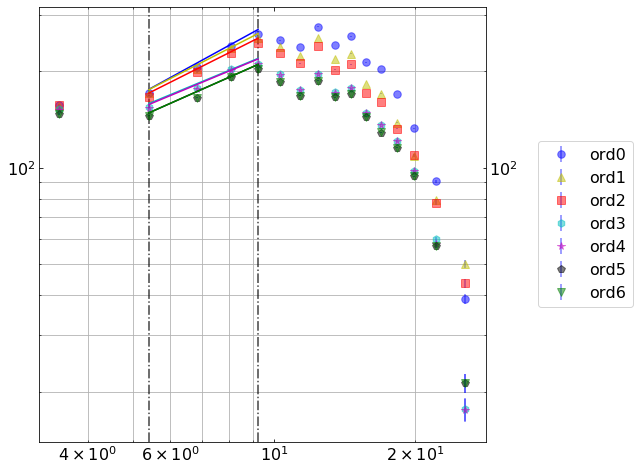

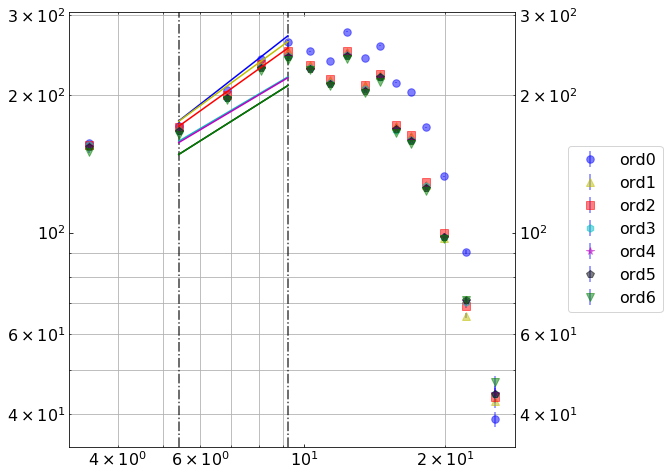

In [35]:
pltdata(SFwh1,SFwh1Pr,xi,xf,n)
pltdata(SFwh2,SFwh1Pr,xi,xf,n)

Autocorrelation Function

In [36]:
AF1=dict()

for i in range(n):
    AF1[i]=acf(argo1[i])
    
AF2=dict()

for i in range(n):
    AF2[i]=acf(argo2[i])

In [37]:
AF1Data=dict()
AF1Inter=dict()


for i in range(n):

    AF1Data[i],AF1Inter[i]=ACLR(AF1[i])
    
AF2Data=dict()
AF2Inter=dict()


for i in range(n):

    AF2Data[i],AF2Inter[i]=ACLR(AF2[i])
    

AF1Data,AF2Data 

({0: array([ 8.44907847, 22.21565975]),
  1: array([ 7.79000646, 22.36355267]),
  2: array([ 7.55217114, 25.83561057]),
  3: array([ 7.59731411, 24.2718871 ]),
  4: array([ 7.61672873, 24.16374133]),
  5: array([ 7.78018978, 23.90980325]),
  6: array([ 7.78017816, 23.9107465 ])},
 {0: array([ 8.44907847, 22.21565975]),
  1: array([ 7.94776206, 20.48617818]),
  2: array([ 7.93063794, 20.37406142]),
  3: array([ 7.94981087, 20.31881821]),
  4: array([ 7.95152757, 20.29228586]),
  5: array([ 7.96789873, 20.28280629]),
  6: array([ 8.06201184, 20.28886124])})

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


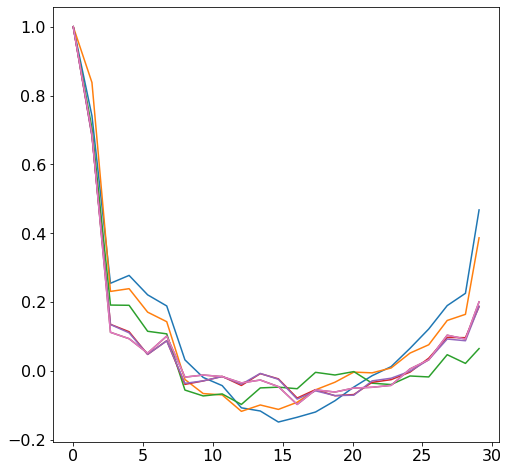

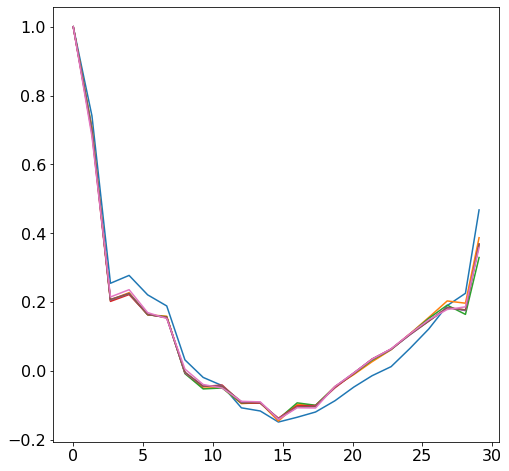

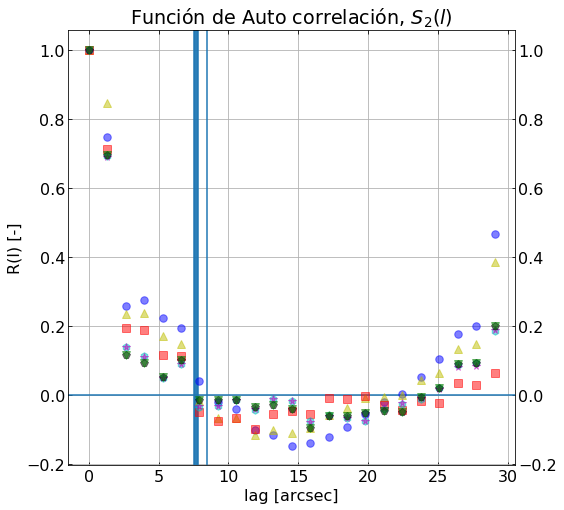

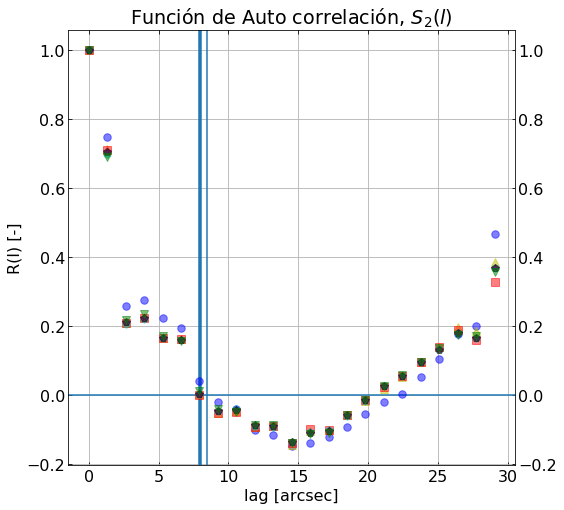

In [38]:
fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    plt.plot(AF1[i]['Lag'],AF1[i]['Nmqvd'])

fig, ax=plt.subplots(figsize=(8,8))
    
for i in range(n):
    plt.plot(AF2[i]['Lag'],AF2[i]['Nmqvd'])
    
marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF1Inter[i][0],AF1Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF1Data[y][i])



marker=itertools.cycle(('o','^','s','h','*','p','v'))
color=itertools.cycle(('b','y','r','c','m','k','g'))

fig, ax=plt.subplots(figsize=(8,8))

for i in range(n):
    ax.errorbar(AF2Inter[i][0],AF2Inter[i][1],fmt=next(marker),color=next(color), ecolor='b', alpha=0.5, markersize=7.5, label='ord' + str(i))

ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Función de Auto correlación, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.grid()
plt.axhline(y=0)

for y in range(n):
    for i in range(1):
        plt.axvline(x=AF2Data[y][i])

1DPSD

In [39]:
PS1=dict()

for i in range(n):
    PS1[i]=ps(argo1[i])
    
PS2=dict()

for i in range(n):
    PS2[i]=ps(argo2[i])

In [40]:
xi=1
xf=10

PS1Data=dict()
mx=len(PS1[i]['k'])
PS1Pr=dict()

for i in range(n):
    PS1Data[i],PS1Pr[i]=LR(PS1[i]['k'][1:mx],PS1[i]['Pk'][1:mx],PS1[i]['Err'][1:mx],xi,xf,n)
    
PS2Data=dict()
PS2Pr=dict()

for i in range(n):
    PS2Data[i],PS2Pr[i]=LR(PS2[i]['k'][1:mx],PS2[i]['Pk'][1:mx],PS2[i]['Err'][1:mx],xi,xf,n)

In [41]:
PS1Data,PS2Data

({0:               R            eps     alpha  lags
  Value  0.772205  159839.408686 -1.772496   1.0
  Err    0.010031    6586.364828  0.006988   9.0,
  1:               R            eps     alpha  lags
  Value  0.789939  179115.761293 -1.824698   1.0
  Err    0.009268    7445.440228  0.007315   9.0,
  2:               R            eps     alpha  lags
  Value  0.788249  178647.230267 -1.823700   1.0
  Err    0.009272    7266.510668  0.007946   9.0,
  3:               R            eps     alpha  lags
  Value  0.771065  147054.372242 -1.716387   1.0
  Err    0.011891    6066.295502  0.007344   9.0,
  4:               R            eps     alpha  lags
  Value  0.770663  146384.322981 -1.713780   1.0
  Err    0.011976    6170.331547  0.006906   9.0,
  5:               R            eps     alpha  lags
  Value  0.718804  129504.463814 -1.653391   1.0
  Err    0.014969    7384.546381  0.000516   9.0,
  6:               R            eps     alpha  lags
  Value  0.718900  129495.536947 -1.653295

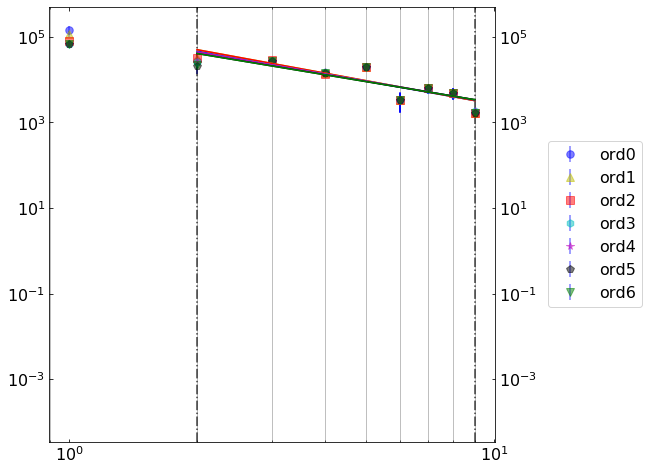

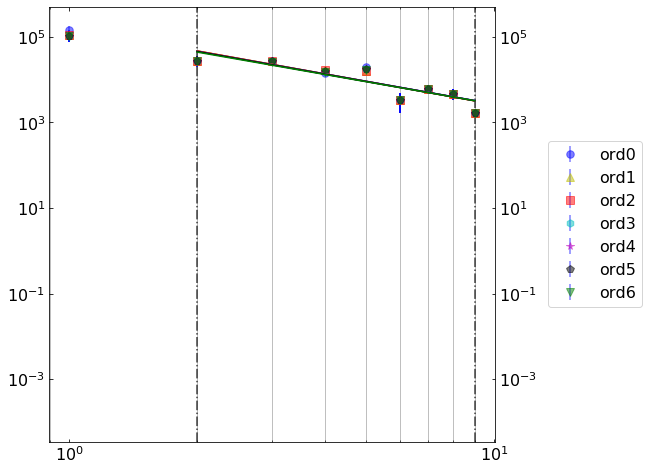

In [42]:
pltdata(PS1,PS1Pr,xi+1,xf,n)
pltdata(PS2,PS2Pr,xi+1,xf,n)

In [43]:
PS1k=dict()

for i in range(n):
    PS1k[i]=psk(argo1[i])
    
PS2k=dict()

for i in range(n):
    PS2k[i]=psk(argo2[i])

In [44]:
xi=1
xf=9

PS1kData=dict()
mx=len(PS1k[0]['k'])
PS1kPr=dict()


for i in range(n):
    PS1kData[i],PS1kPr[i]=LR(PS1k[i]['k'][1:mx],PS1k[i]['Pk'][1:mx],PS1k[i]['Err'][1:mx],xi,xf,n)
    
PS2kData=dict()
PS2kPr=dict()

for i in range(n):
    PS2kData[i],PS2kPr[i]=LR(PS2k[i]['k'][1:mx],PS2k[i]['Pk'][1:mx],PS2k[i]['Err'][1:mx],xi,xf,n)

In [45]:
PS1kData,PS2kData

({0:               R          eps     alpha   lags
  Value  0.823585  1137.337270 -1.317674  0.083
  Err    0.013597    65.872216  0.002924  0.382,
  1:               R          eps     alpha   lags
  Value  0.819949  1134.886926 -1.338281  0.083
  Err    0.010828    69.625783  0.004398  0.382,
  2:               R          eps     alpha   lags
  Value  0.817901  1135.780815 -1.337303  0.083
  Err    0.010947    70.579066  0.004764  0.382,
  3:               R          eps     alpha   lags
  Value  0.819371  1228.815722 -1.273666  0.083
  Err    0.014486    74.317002  0.004046  0.382,
  4:               R          eps     alpha   lags
  Value  0.820509  1229.566557 -1.272957  0.083
  Err    0.014416    74.196651  0.003867  0.382,
  5:               R          eps     alpha   lags
  Value  0.813754  1207.471398 -1.266541  0.083
  Err    0.015179    69.740482  0.000949  0.382,
  6:               R          eps     alpha   lags
  Value  0.813893  1207.675492 -1.266491  0.083
  Err    0.01

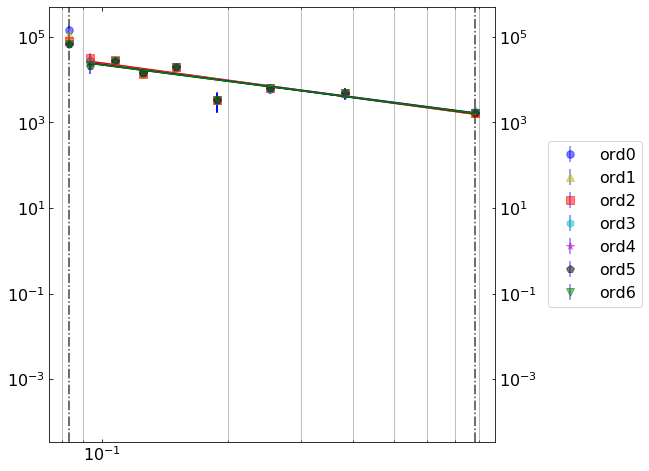

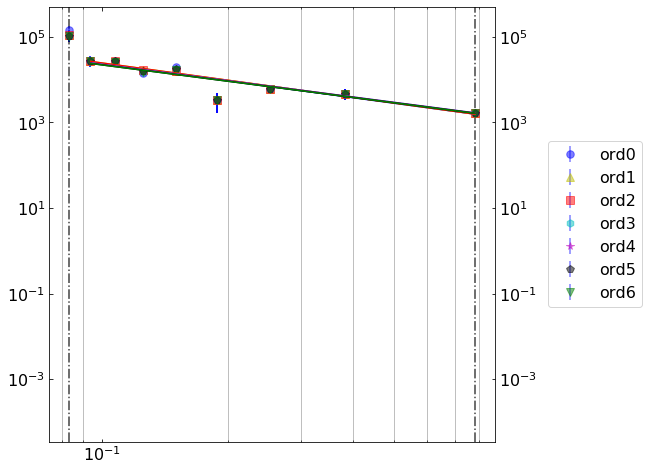

In [46]:
pltdata(PS1k,PS1kPr,xi,xf+1,n)
pltdata(PS2k,PS1kPr,xi,xf+1,n)

1DPSD Turbustat

In [47]:
PST1a=dict()
PST1b=dict()


for i in range(n):
    PST1a[i],PST1b[i]=pst(argo1[i])
    
PST2a=dict()
PST2b=dict()

for i in range(n):
    PST2a[i],PST1b[i]=pst(argo2[i])

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/b

In [48]:
for i in range(n):
    print(PST1a[i].slope2D,PST1a[i].slope2D_err)
    


-1.5934319369407508 0.2867990684381859
-1.7474319179442193 0.28454011878030827
-1.7773275712049341 0.3145816936709144
-1.7704103232048103 0.2997211919484054
-1.7271575844127123 0.2954777290930317
-1.7301675957145533 0.24547285998257462
-1.7307207322794882 0.2983103813834289


In [49]:
for i in range(n):
    print(PST2a[i].slope2D,PST2a[i].slope2D_err)

-1.5934319369407508 0.2593292539628038
-1.5655593452564096 0.32954265750594847
-1.5585742861609635 0.30929547808101354
-1.4533701442434888 0.36038490911464716
-1.558355234816031 0.3258109315155917
-1.5438413330110865 0.29122793037386396
-1.32367255382813 0.29182267443828447


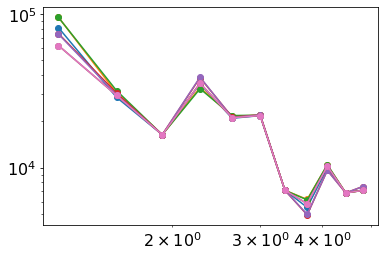

In [50]:
for i in range(n):
    plt.loglog(PST1a[i].wavenumbers,PST1a[i].ps1D,'o-', label=str(i))
    #plt.legend()

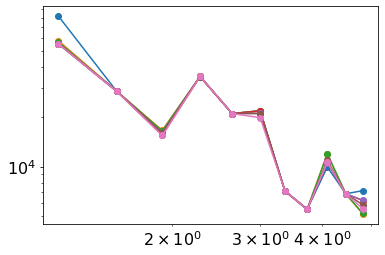

In [51]:
for i in range(n):
    plt.loglog(PST2a[i].wavenumbers,PST2a[i].ps1D,'o-', label=str(i))
    #plt.legend()

In [52]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 164.47709941864014 seconds ---


In [53]:
#SF1

In [54]:
#SF1.to_csv('SF1.csv')